**Deep Generative Model for Synthetic Tabular data**

**Objective**

The objective of this project is to design and evaluate a deep generative model (CTGAN) capable of genrating high-quality syntheic tabular data. The quality of the generated data is assessed using statistical similarity metrics and downstream machine learning performance.


**Installation of Libraries**

In [6]:
!pip install sdv pandas numpy scikit-learn matplotlib seaborn

**Import Required Libraries**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

import warnings
warnings.filterwarnings("ignore")

**Dataset Description**

**Dataset Name:** Adult.csv

**Dataset Variable:** Bankrupt?

**Type:** Numerical Tabular financial data

The dataset contains financial ratios used to predict corporate bankrupty. It is suitable for synthetic data generation due to its structured tabular format.

**Read CSV File**

In [9]:
data = pd.read_csv('/content/adult.csv')


**Intitial Data Inspection**

In [10]:
data.shape



(6819, 96)

In [11]:
data.columns.tolist()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [13]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [14]:
data.isnull().sum()

,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


**Data Cleaning & Preprocessing**

This step ensures the dataset is clean and suitable for training a generative model. Column names are standardized and missing values are checked.

**Clean Data**

In [15]:
data.columns = data.columns.str.strip()
data.isnull().sum().sum()

np.int64(0)

**Target Variable Analysis**

In [16]:
target_column = "Bankrupt?"
data[target_column].value_counts()

,count
Bankrupt?,
0,6599
1,220


**CTGAN Model Initialization**     
CTGAN is used to learn the joint distribution of all features and the target variable in order to generate realistic synthetic tabular data.

**Train CTGAN Model**

In [17]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

ctgan = CTGANSynthesizer(
    metadata,
    epochs=300,
    verbose=True
)

In [18]:
ctgan.fit(data)

PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name                                    Est # of Columns (CTGAN)
Bankrupt?                                               2
ROA(C) before interest and depreciation before interest 11
ROA(A) before interest and % after tax                  11
ROA(B) before interest and depreciation after tax       11
Operating Gross Margin                                  11
Realized Sales Gross Margin                             11
Operating Profit Rate                                   11
Pre-tax net Interest Rate                               11
After-tax net Interest Rate                             11
Non-industry income and expenditure/revenue             11
Continuous interest rate (after tax)                    11
Operating Expense Rate                                  11
Research and development expense rate                   11
Cash fl

Gen. (-1.88) | Discrim. (0.96): 100%|██████████| 300/300 [32:16<00:00,  6.45s/it]


**Synthetic Data Generation**    
After training, the CTGAN is used to generate synthetic samples with the same size as the original dataset

**Generate & Save Synthetic Data**

In [19]:
synthetic_data = ctgan.sample(len(data))
synthetic_data.head()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.545430,0.650311,0.543389,0.599108,0.599160,1.0,0.793401,0.809415,0.306326,...,0.833287,0.000000e+00,0.619254,0.605883,0.843282,0.277580,0.025757,0.568842,1,0.336506
1,0,0.496650,0.699777,0.484649,0.588790,0.646162,1.0,0.799800,0.810985,0.301146,...,0.832511,2.887688e+06,0.619657,0.594207,0.838500,0.284210,0.025308,0.543562,1,0.036316
2,0,0.530046,0.634728,0.480819,0.578412,0.636215,1.0,0.796022,0.811415,0.304108,...,0.809143,0.000000e+00,0.621640,0.613706,0.834763,0.286228,0.024677,0.566425,1,0.078817
3,1,0.385038,0.396616,0.268034,0.534278,0.651712,1.0,0.795596,0.810426,0.301517,...,0.747665,0.000000e+00,0.620713,0.617496,0.829665,0.274386,0.028622,0.568216,1,0.004630
4,0,0.437531,0.515158,0.531901,0.586819,0.620047,1.0,0.796145,0.809344,0.303067,...,0.825309,0.000000e+00,0.624486,0.589580,0.833618,0.284711,0.025412,0.562233,1,0.085298


In [20]:
synthetic_data.shape

(6819, 96)

In [21]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [22]:
synthetic_data["Bankrupt?"].value_counts()

,count
Bankrupt?,
0,5475
1,1344


In [23]:
data["Bankrupt?"].value_counts()

,count
Bankrupt?,
0,6599
1,220


In [24]:
synthetic_data.to_csv("synthetic_bankruptcy_data.csv", index=False)


In [25]:
from google.colab import files
files.download("synthetic_bankruptcy_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Statistical Similarity Evaluation**       
The real and synthetic datasets are compared using statistical measures such as mean, standard deviation, and distributed plots.

**Mean & STD Comparison**

In [26]:
real_stats = data.describe().loc[['mean', 'std']]
sythetic_stats = synthetic_data.describe().loc[['mean','std']]

In [27]:
comparison = pd.concat(
    [real_stats, sythetic_stats],
    keys = ['Real Data', 'Synthetic Data']
)
comparison.iloc[:, :5]

Bankrupt?  \
Real Data      mean   0.032263   
               std    0.176710   
Synthetic Data mean   0.197096   
               std    0.397835   

                     ROA(C) before interest and depreciation before interest  \
Real Data      mean                                           0.505180         
               std                                            0.060686         
Synthetic Data mean                                           0.489188         
               std                                            0.115180         

                     ROA(A) before interest and % after tax  \
Real Data      mean                                0.558625   
               std                                 0.065620   
Synthetic Data mean                                0.571357   
               std                                 0.112631   

                     ROA(B) before interest and depreciation after tax  \
Real Data      mean                                           0.553589   
               std                                            0.061595   
Synthetic Data mean                                           0.496393   
               std                                            0.103778   

                     Operating Gross Margin  
Real Data      mean                0.607948  
               std                 0.016934  
Synthetic Data mean                0.598632  
               std                 0.017978

**Distribution Plots**

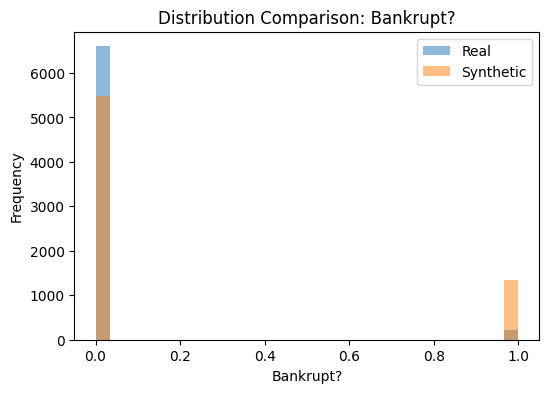

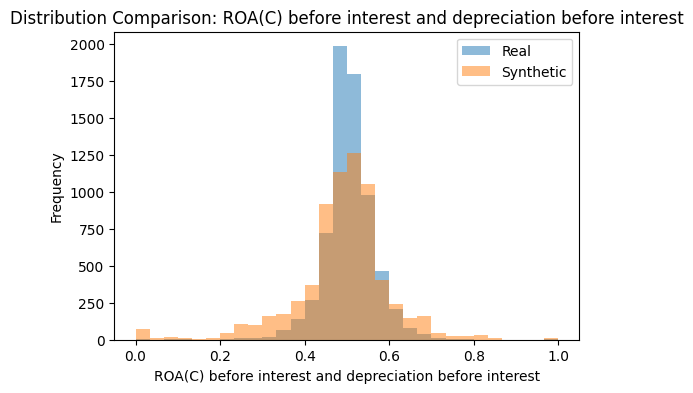

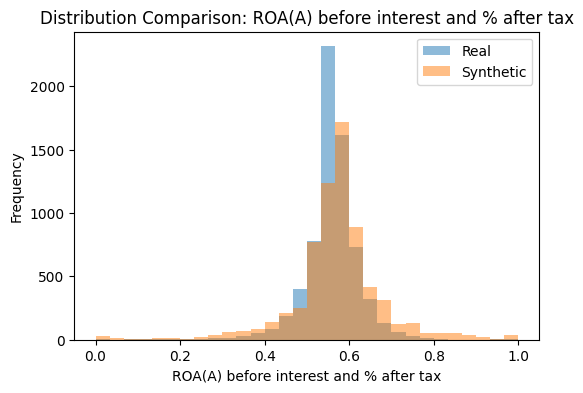

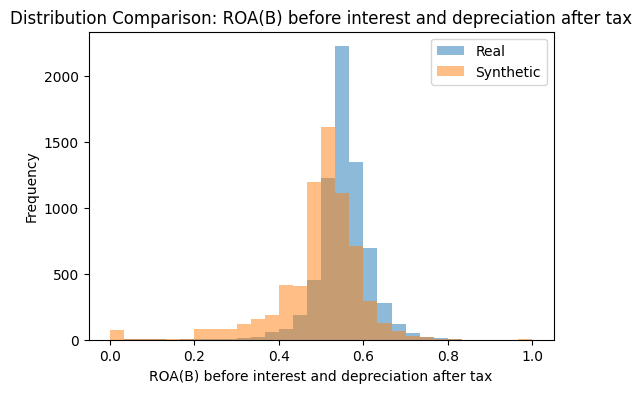

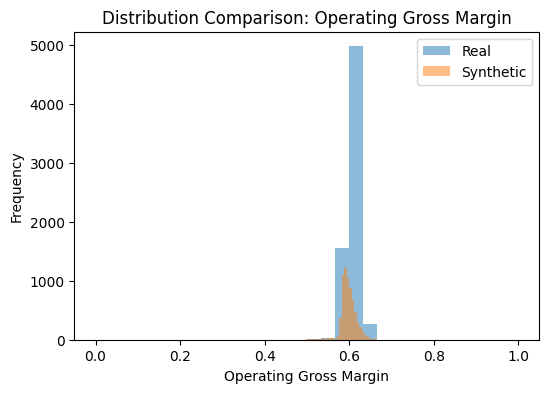

In [28]:
columns_to_plot = data.columns[:5]

for col in columns_to_plot:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=30, alpha=0.5, label="Real")
    plt.hist(synthetic_data[col], bins=30, alpha=0.5, label="Synthetic")
    plt.title(f"Distribution Comparison: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


In [29]:
print("Real Data Target Distribution:")
print(data["Bankrupt?"].value_counts(normalize=True))

print("\nSynthetic Data Target Distribution:")
print(synthetic_data["Bankrupt?"].value_counts(normalize=True))


Real Data Target Distribution:
Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

Synthetic Data Target Distribution:
Bankrupt?
0    0.802904
1    0.197096
Name: proportion, dtype: float64


**ML Utility Evaluation**           
This step evaluates whether synthetic data can be effectively used train machine learning models that generalize well to real data.

**Train on Synthetic, Test on Real**

In [30]:
target_column = "Bankrupt?"

X_real = data.drop(columns=[target_column])
y_real = data[target_column]

X_real_train, X_real_test, y_real_train, y_real_test = train_test_split(
    X_real, y_real, test_size=0.3, random_state=42, stratify=y_real
)

In [31]:
X_syn = synthetic_data.drop(columns=[target_column])
y_syn = synthetic_data[target_column]



In [32]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_syn, y_syn)

RandomForestClassifier(n_estimators=200, random_state=42)

In [33]:
y_pred = rf_model.predict(X_real_test)

print("Accuracy (Synthetic → Real):", accuracy_score(y_real_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_real_test, y_pred))


Accuracy (Synthetic → Real): 0.9652981427174976

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1980
           1       0.45      0.33      0.38        66

    accuracy                           0.97      2046
   macro avg       0.71      0.66      0.68      2046
weighted avg       0.96      0.97      0.96      2046



In [34]:
baseline_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

baseline_model.fit(X_real_train, y_real_train)
baseline_pred = baseline_model.predict(X_real_test)

print("Accuracy (Real -> Real):", accuracy_score(y_real_test, baseline_pred))


Accuracy (Real -> Real): 0.9716520039100685


**Conclusion**             
The CTGAN model successfully generated high-quality synthetic tabular data that closely resembles the real dataset. Statistical similarity and downstream maachine learning evaluation confirm that the synthetic data preserves meaningful patterns and can be as a reliable substitute for real in model training.